### Import libraries

In [35]:
import math
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

### Import dataset & Remove missing values

In [2]:
df = pd.read_csv('housing.csv')
df.dropna(inplace=True)

### Check the vibes of the dataset

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### Visualize the data

In [36]:
def natural_log(x):
    """
    Calculate the natural logarithm (base e) of x.

    Args:
        x (float): The value to calculate the logarithm for. Must be > 0.

    Returns:
        float: The natural logarithm of x.

    Raises:
        ValueError: If x <= 0.
    """
    if x <= 0:
        return np.nan  # Return NaN for invalid inputs in DataFrames
    return math.log(x)

In [7]:
def plot_freq_dist(data, color: str = "red", title: str = "N/A"):
    """
    data: 1d dataframe to plot on the graph
    """
    data_size = data.shape[0]
    # Let's use the Scott's rule for choosing the right bin width
    w = 3.49 * np.std(data) / data_size ** (1.0 / 3)

    # define number of bins with accordance to the appropriate size
    bins = np.arange(data.min().item(), data.max().item() + w, w, dtype=float)

    plt.hist(data, edgecolor=color, bins=bins)
    plt.xlabel("{} distribution".format(title))  # Set x-axis label
    plt.ylabel("frequency")  # Set y-axis label
    plt.show()  # Show the plot

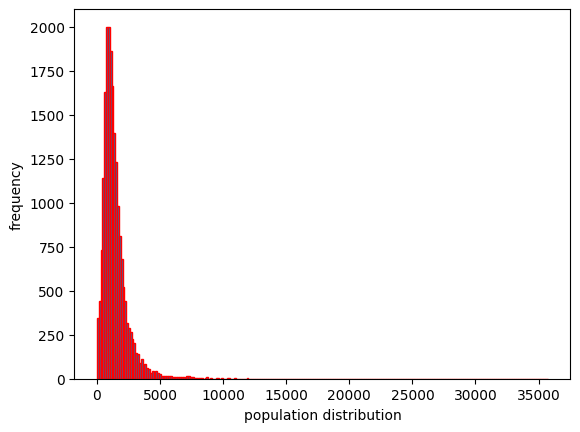

In [8]:
plot_freq_dist(df['population'], color="red", title="population")

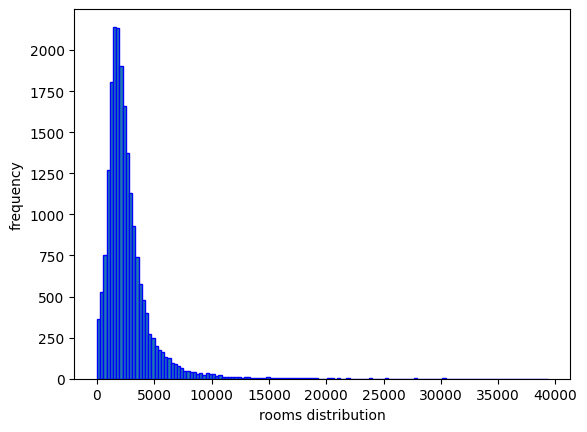

In [9]:
plot_freq_dist(df['total_rooms'], color="blue", title="rooms")

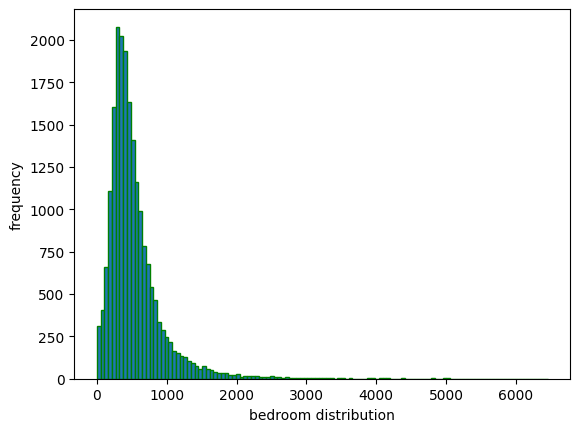

In [10]:
plot_freq_dist(df['total_bedrooms'], color="green", title="bedroom")

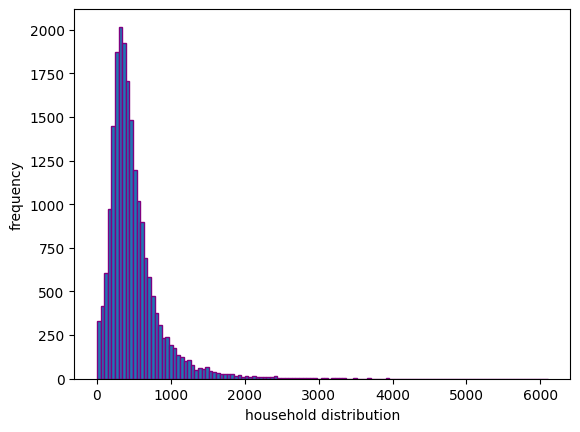

In [11]:
plot_freq_dist(df['households'], color="purple", title="household")

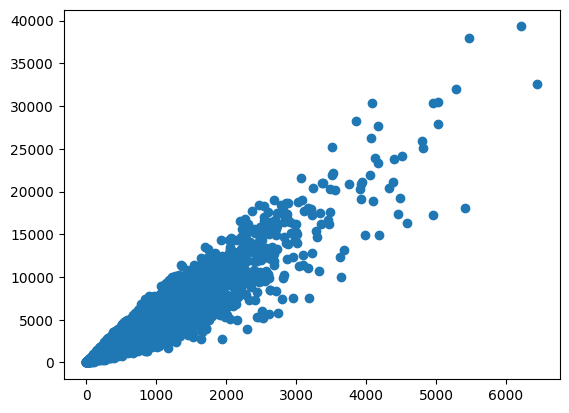

In [12]:
plt.scatter(df['total_bedrooms'], df['total_rooms'])

In [13]:
def plot_linear_regression(predictor, outcome, title="", xlab="", ylab=""):
    """
    Takes two different columns: predictor and the outcome, and then returns a matplotlib plot of the LinearRegression using sklearn +
    r2_score of it
    """
    # Reshape predictor and outcome columns to 2D arrays
    predictor = predictor.reshape(-1, 1)
    outcome = outcome.reshape(-1, 1)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(predictor, outcome)

    # Make predictions
    predictions = model.predict(predictor)

    # Calculate R^2 score
    r2 = r2_score(outcome, predictions)

    # Plot the data points and the regression line
    plt.scatter(predictor, outcome, color="blue")
    plt.plot(predictor, predictions, color="red")
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    # plt.legend()

    # Display R^2 score, betas, and intercept
    plt.text(
        0.95,
        0.95,
        f"R^2 = {r2:.2f}",
        ha="right",
        va="top",
        transform=plt.gca().transAxes,
    )
    plt.text(
        0.95,
        0.90,
        f"Beta 0 (Intercept) = {model.intercept_[0]:.2f}",
        ha="right",
        va="top",
        transform=plt.gca().transAxes,
    )
    plt.text(
        0.95,
        0.85,
        f"Beta 1 = {model.coef_[0][0]:.2f}",
        ha="right",
        va="top",
        transform=plt.gca().transAxes,
    )

    # Show the plot
    plt.show()

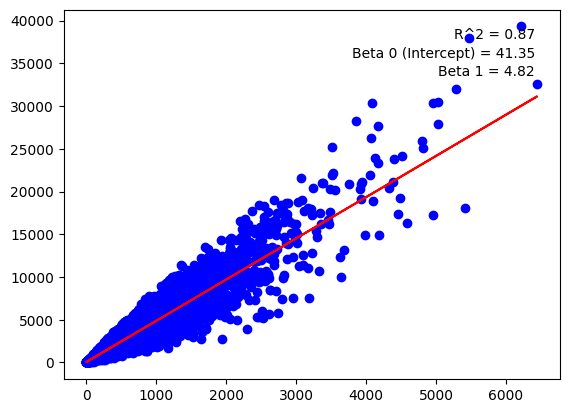

In [14]:
plot_linear_regression(df["total_bedrooms"].to_numpy(), df["total_rooms"].to_numpy())

## Plot the data on a map

In [15]:
full_data = gpd.read_file("./CA_county_boundaries.shp")
points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))

In [16]:
full_data.head()

,GEOID,name,area_sqkm,geometry
0,6091,Sierra County,2491.995494,"POLYGON ((-120.6556 39.69357, -120.65554 39.69..."
1,6067,Sacramento County,2575.258262,"POLYGON ((-121.18858 38.71431, -121.18732 38.7..."
2,6083,Santa Barbara County,9813.817958,"MULTIPOLYGON (((-120.58191 34.09856, -120.5822..."
3,6009,Calaveras County,2685.626726,"POLYGON ((-120.63095 38.34111, -120.63058 38.3..."
4,6111,Ventura County,5719.321379,"MULTIPOLYGON (((-119.63631 33.27304, -119.6360..."


<Axes: >

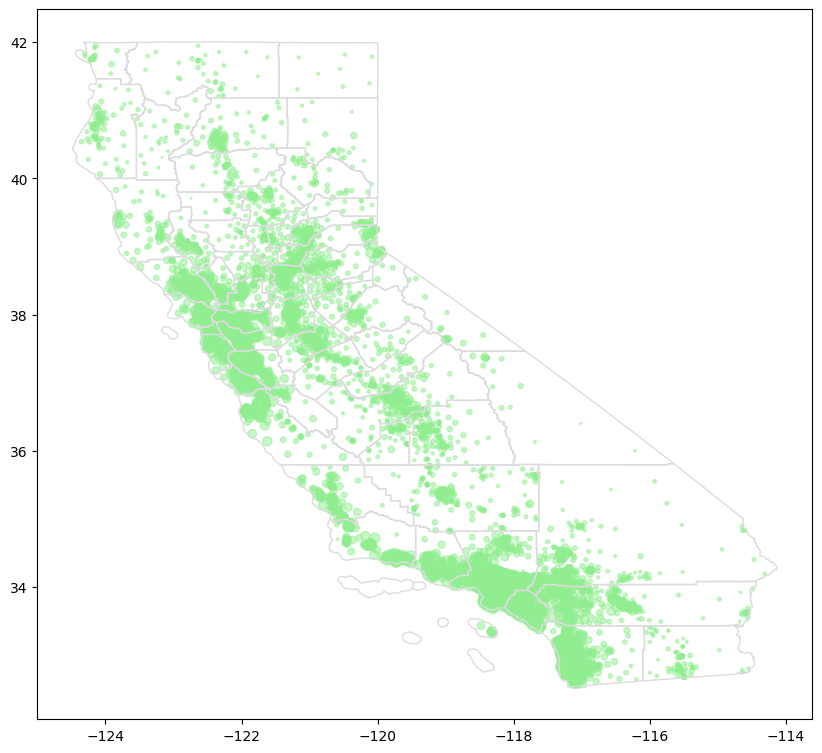

In [17]:
ax = full_data.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

points.plot(color='lightgreen', markersize=df['median_house_value']/10000, alpha=0.5, ax=ax, marker='o')

## Identify correlation coefficients

In [18]:
cols = [
    'population','households',
    'total_rooms','total_bedrooms',
    'housing_median_age','median_income',
    'median_house_value'
]

corr = df[cols].corr()

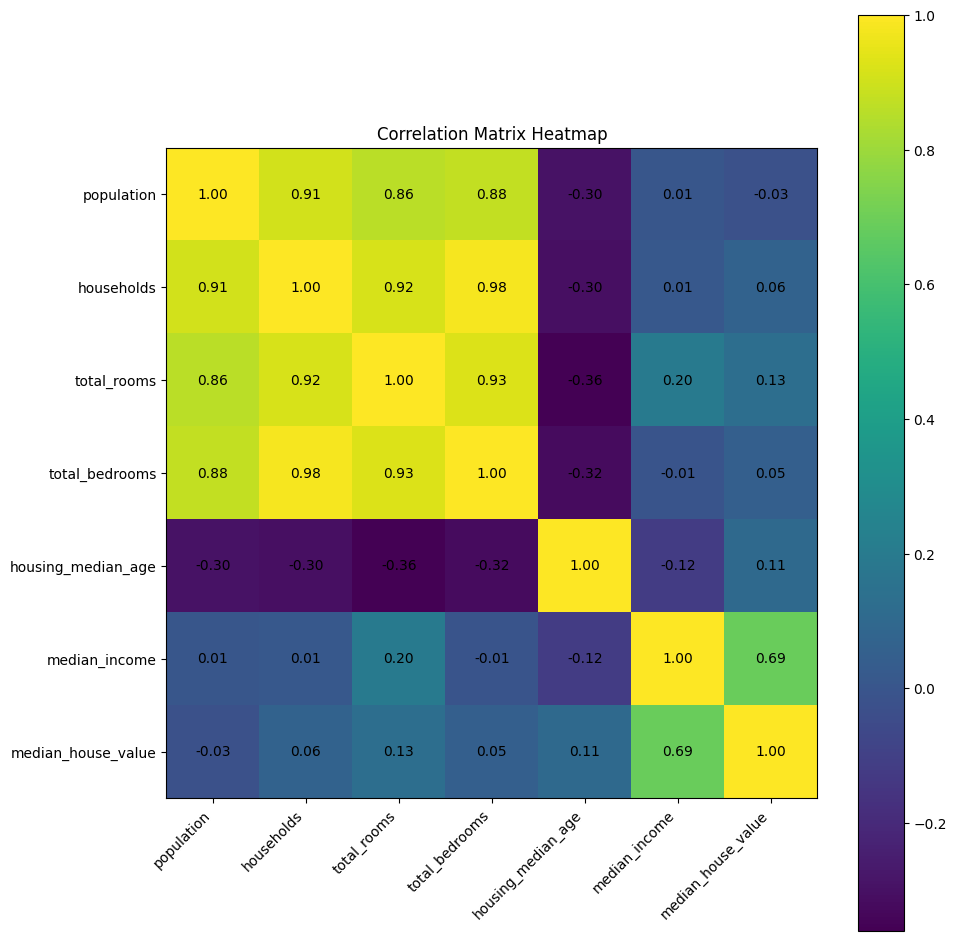

In [19]:
# heatmap
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(corr.values)
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, rotation=45, ha='right')
ax.set_yticks(range(len(cols)))
ax.set_yticklabels(cols)

# annotate
for i in range(len(cols)):
    for j in range(len(cols)):
        ax.text(j, i, f"{corr.values[i, j]:.2f}", ha="center", va="center")

# colorbar and title
fig.colorbar(im, ax=ax)
ax.set_title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

## Normalizing and scaling

In [20]:
df["people_per_household"] = df["population"] / df["households"]
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,people_per_household
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,3.071533
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,10.438269
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.692308
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,2.429032
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,2.817582
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,3.281513
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1243.333333


In [21]:
df.drop(columns=["population", "households", "total_bedrooms"], inplace=True)

 ## Remap correlation matrix

In [22]:
cols = [
    'people_per_household','total_rooms',
    'housing_median_age','median_income',
    'median_house_value'
]

corr = df[cols].corr()

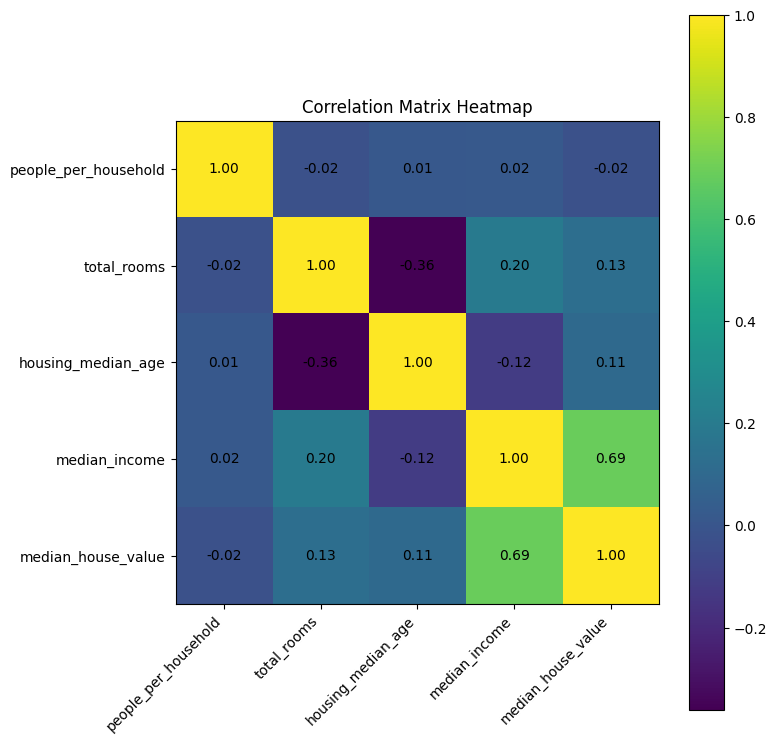

In [23]:
# heatmap
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(corr.values)
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, rotation=45, ha='right')
ax.set_yticks(range(len(cols)))
ax.set_yticklabels(cols)

# annotate
for i in range(len(cols)):
    for j in range(len(cols)):
        ax.text(j, i, f"{corr.values[i, j]:.2f}", ha="center", va="center")

# colorbar and title
fig.colorbar(im, ax=ax)
ax.set_title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

<BarContainer object of 5 artists>

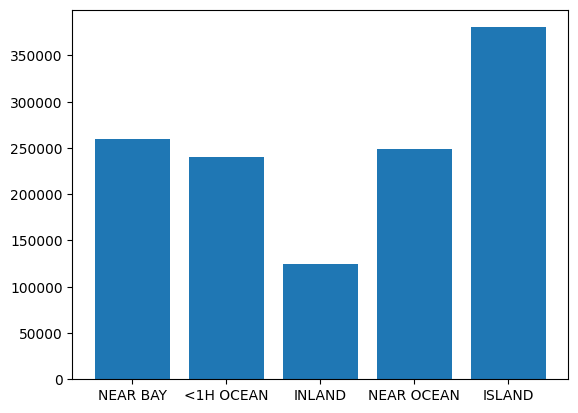

In [24]:
array = []
for i in df["ocean_proximity"].unique():
    array.append(df[df["ocean_proximity"] == i]["median_house_value"].mean())

plt.bar(df["ocean_proximity"].unique(), array)

In [25]:
pd.set_option('future.no_silent_downcasting', True)
df["ocean_proximity"] = df["ocean_proximity"].replace(
    ["NEAR BAY", "<1H OCEAN", "INLAND", "NEAR OCEAN", "ISLAND"],
    [0, 0, -1, 0, 1]
).infer_objects()
df.head()

,longitude,latitude,housing_median_age,total_rooms,median_income,median_house_value,ocean_proximity,people_per_household
0,-122.23,37.88,41.0,880.0,8.3252,452600.0,0,2.555556
1,-122.22,37.86,21.0,7099.0,8.3014,358500.0,0,2.109842
2,-122.24,37.85,52.0,1467.0,7.2574,352100.0,0,2.802260
3,-122.25,37.85,52.0,1274.0,5.6431,341300.0,0,2.547945
4,-122.25,37.85,52.0,1627.0,3.8462,342200.0,0,2.181467


## Normalizing the data

In [26]:
scalar = StandardScaler()
scalar.fit(df[["housing_median_age", "total_rooms", "median_income", "people_per_household", "ocean_proximity"]])
df[["housing_median_age", "total_rooms", "median_income", "people_per_household", "ocean_proximity"]] = scalar.transform(df[["housing_median_age", "total_rooms", "median_income", "people_per_household", "ocean_proximity"]])

In [27]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,median_income,median_house_value,ocean_proximity,people_per_household
0,-122.23,37.88,0.982163,-0.803813,2.345163,452600.0,0.681559,-0.049433
1,-122.22,37.86,-0.606210,2.042130,2.332632,358500.0,0.681559,-0.092134
2,-122.24,37.85,1.855769,-0.535189,1.782939,352100.0,0.681559,-0.025797
3,-122.25,37.85,1.855769,-0.623510,0.932970,341300.0,0.681559,-0.050162
4,-122.25,37.85,1.855769,-0.461970,-0.013143,342200.0,0.681559,-0.085272


## Predicting house

In [28]:
X = df[["housing_median_age", "total_rooms", "median_income", "people_per_household", "ocean_proximity"]]
y = df["median_house_value"]

In [29]:
linear_reg = LinearRegression()
linear_reg.fit(X, y)

LinearRegression()

In [30]:
linear_reg.intercept_

np.float64(206864.4131551901)

In [31]:
ma = input("Enter Housing Median Age: ")
tr = input("Enter Total Rooms: ")
mi = input("Enter Median Income: ")
ph = input("Enter People In House: ")
op = input("Enter Ocean Proximity, 0 for Near Bay, <1H Ocean, Near Ocean, 1 for Island, -1 for Inland: ")

ma, tr, mi, ph, op

('70', '15', '400000', '3', '0')

In [32]:
ma_val = float(ma)
tr_val = float(tr)
mi_val = float(mi) / 10000
ph_val = float(ph)
op_val = int(op)
input_data = pd.DataFrame([[ma_val, tr_val, mi_val, ph_val, op_val]], columns=["housing_median_age", "total_rooms", "median_income", "people_per_household", "ocean_proximity"])

input_data[["housing_median_age", "total_rooms", "median_income", "people_per_household", "ocean_proximity"]] = scalar.transform(input_data[["housing_median_age", "total_rooms", "median_income", "people_per_household", "ocean_proximity"]])
input_data.head()

,housing_median_age,total_rooms,median_income,people_per_household,ocean_proximity
0,3.285305,-1.199654,19.022739,-0.006853,0.681559


In [41]:
prediction = linear_reg.predict(input_data)

In [42]:
print(prediction)

[1628897.64917846]
